# Likelihood and model fitting

Peter Ralph

https://uodsci.github.io/dsci345

In [1]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15, 6)
import numpy as np
import pandas as pd
import dsci345 as dsci
import math

rng = np.random.default_rng(seed=123)

$$\renewcommand{\P}{\mathbb{P}} \newcommand{\E}{\mathbb{E}} \newcommand{\var}{\text{var}} \newcommand{\sd}{\text{sd}}$$
This is here so we can use `\P` and `\E` and `\var` and `\sd` in LaTeX below.

Outline:

1. Guess at p from flipping coins
2. Infer mu from Gaussian observations
3. General method
4. Relationship to method of moments
5. Example without math

# Guess the probability

i.e., Maximum Likelihood with the Binomial

We've got a weird-looking coin,
and we'd like to figure out the probability that it comes up Heads
when it's flipped.
How do we do this?

*(More generally: from independent draws of a 0/1-valued random variable $Y$ with $\P\{Y = 1\} = p$, infer $p$.)*

Let's say out of 20 flips it came up Heads 15 times.
What's your best guess at $p$?

Well, since the number of heads, $X$, is $\text{Binomial}(20, p)$,
$$
    \P\{ X = 15 \}
    =
    \binom{20}{15} p^{15} (1-p)^5.
$$
Let's call this $L(p)$.

Maximizing $L(p)$ is the same as maximizing $\log L(p)$, and
$$
\frac{d}{dp} \log L(p) = \frac{15}{p} - \frac{5}{1-p} ,
$$
which is equal to 0 at $p = 3/4$. (*also check:* $d^2/dp^2 \log L(p) \le 0$)

Okay, so our guess is $p = 0.75$ "by maximum likelihood".
How sure are we?

In [5]:
def L(p):
    C = math.factorial(20) / (math.factorial(15) * math.factorial(5))
    return C * (p ** 15) * ((1-p) ** 5)

pvals = np.linspace(0, 1, 11)
for p, Lp in zip(pvals, L(pvals)):
    print(f"p={p:.1f}, L(p)={Lp:.2f}")

p=0.0, L(p)=0.00
p=0.1, L(p)=0.00
p=0.2, L(p)=0.00
p=0.3, L(p)=0.00
p=0.4, L(p)=0.00
p=0.5, L(p)=0.01
p=0.6, L(p)=0.07
p=0.7, L(p)=0.18
p=0.8, L(p)=0.17
p=0.9, L(p)=0.03
p=1.0, L(p)=0.00


Plotting the value of $L(p)$ against $p$, the *likelihood surface*
forms a bump with the maximum value around 0.75:

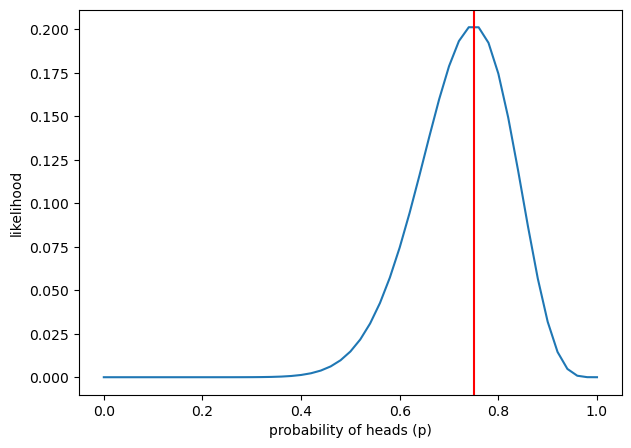

In [47]:
pvals = np.linspace(0, 1, 51)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(pvals, L(pvals))
ax.set_xlabel("probability of heads (p)")
ax.set_ylabel("likelihood")
ax.axvline(0.75, c='red');
plt.savefig("fig1.pdf", dpi=144)

# Guess the mean

i.e., Maximum Likelihood with the Gaussian

I weighed 5 apples off my tree yesterday; their weights were 112g, 145g, 131g, 98g, and 104g.
I've got about 200 apples on the tree;
what's our estimate of their total weight?

In [7]:
x = [112, 145, 131, 98, 104]
np.mean(x)

np.float64(118.0)

Well, the average weight of those was 118g, so... probably around 200 * 118g = 23600g = 23.6kg?

*More formally:* let's assume the distribution of the weights (across *all* the apples) is Normal.
If the mean is $\mu$ grams and standard deviation $\sigma$ grams, then the chance* of getting an apple
that weighs $x$ grams is
$$   L(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{(x - \mu)^2}{2 \sigma^2}\right) . $$
*(okay, this is actually a probability density, but let's go with it)*

So, the chance of getting apples weighing $x_1, \ldots, x_n$ is
$$   \prod_{i=1}^n L(x_i; \mu, \sigma)
  = 
  \frac{1}{\sqrt{2 \pi \sigma^2}^n} \exp\left(- \frac{\sum_{i=1}^n (x_i - \mu)^2}{2 \sigma^2} \right) . $$

So, the *log-likelihood* is
$$
  \log L(x; \mu, \sigma) = - \frac{1}{2 \sigma^2}\sum_{i=1}^n (x_i - \mu)^2 - n \log(2 \pi \sigma^2)/2 ,
$$
and
$$\begin{aligned}
  \frac{d}{d\mu} \log L(x; \mu, \sigma) 
  &=
  \frac{1}{2\sigma^2}\sum_{i=1}^n 2 (x_i - \mu) \\
  &=
  \frac{n}{\sigma^2}\left( \left(\frac{1}{n} \sum_{i=1}^n x_i\right) - \mu \right)
\end{aligned}$$
Notice that $\bar x = \sum_{i=1}^n x_i / n$ is the *sample mean*.

So, $L(x;\mu,\sigma)$ is maximized if $\mu = \bar x$.
(But first: check this is a maximum, not a minimum.)
Remarkably, this doesn't depend on $\sigma$!

We've learned that:

1. Given independent samples from a Normal($\mu$, $\sigma$) distribution,
    the maximum-likelihood estimate for $\mu$ is the sample mean.

2. Maximizing the likelihood of a Normal distribution
    requires minimizing the sum of squared errors.

3. The maximum likelihood estimate for the mean apple weight on my tree is 118g.

Again: how certain are we? Now, the answer *depends on $\sigma$*.

In [8]:
x = np.array([112, 145, 131, 98, 104])

def normal_L(mu, sigma):
    C = np.sqrt(2 * math.pi * sigma**2)
    return np.prod(np.exp(- (x - mu)**2 / (2 * sigma**2)) / C)

muvals = np.linspace(100, 140, 11)
for m in muvals:
    print(f"mu={m}, L(x;sigma=5)={normal_L(m, sigma=5):.2g}, L(x; sigma=25)={normal_L(m, sigma=25):.2g}")

mu=100.0, L(x;sigma=5)=1.4e-33, L(x; sigma=25)=8.3e-11
mu=104.0, L(x;sigma=5)=5.1e-28, L(x; sigma=25)=1.4e-10
mu=108.0, L(x;sigma=5)=7.5e-24, L(x; sigma=25)=2e-10
mu=112.0, L(x;sigma=5)=4.5e-21, L(x; sigma=25)=2.6e-10
mu=116.0, L(x;sigma=5)=1.1e-19, L(x; sigma=25)=3e-10
mu=120.0, L(x;sigma=5)=1.1e-19, L(x; sigma=25)=3e-10
mu=124.0, L(x;sigma=5)=4.5e-21, L(x; sigma=25)=2.6e-10
mu=128.0, L(x;sigma=5)=7.5e-24, L(x; sigma=25)=2e-10
mu=132.0, L(x;sigma=5)=5.1e-28, L(x; sigma=25)=1.4e-10
mu=136.0, L(x;sigma=5)=1.4e-33, L(x; sigma=25)=8.3e-11
mu=140.0, L(x;sigma=5)=1.6e-40, L(x; sigma=25)=4.4e-11


The likelihood surfaces are both bumps peaked at 118,
but for $\sigma=5$ is much more steeply
than for $\sigma=25$.

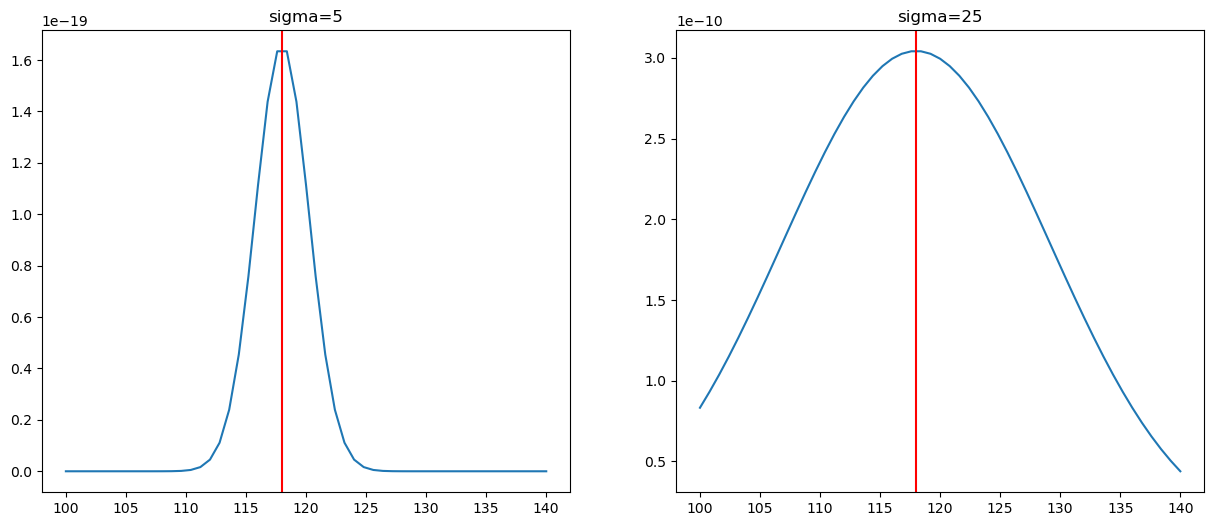

In [9]:
muvals = np.linspace(100, 140, 51)

sigvals = [5, 25]
fig, axes = plt.subplots(1, len(sigvals))
for sig, ax in zip(sigvals, axes):
    ax.plot(muvals, [normal_L(m, sig) for m in muvals])
    ax.axvline(np.mean(x), c='r')
    ax.set_title(f"sigma={sig}")

**Exercise:** Make the plots using `scipy.stats.norm.pdf`:

In [33]:
import scipy.stats

def normal_L2(x, mu, sigma):
    return np.prod(scipy.stats.norm.pdf(x, loc=mu, scale=sigma))


mu, sigma = 150, 50
print(normal_L(mu, sigma), normal_L2(x, mu, sigma))

8.552412635759266e-12 8.552412635759269e-12


# Likelihood surfaces

So, what did we just do? We

1. formulated a generative model that seems likely to fit the data
    with some free parameters
    that describe what we want to know about,
2. wrote down the *likelihood* (i.e., probability) of generating *our actual data*
    as a function of the parameter(s), and
3. said that "gee, seems like a good guess of the parameter(s) values are the ones that
    make our data look most probable".

*Formally:* given data $D$ and a model $M$ with parameters $\theta \in A$ and likelihood function
$$ L_M(D|\theta) = \P_M\{D|\theta\} , $$
a *maximum likelihood estimate* of $\theta$ is
$$  \theta^* = \text{argmax}_{\theta \in A}\{ L_M(D|\theta) \}, $$
i.e., $\theta^*$ is the parameter values that maximize the likelihood.

# Example: the gamma distribution

Let's say we have hourly rainfall measurements
throughout a winter storm.
We'd like to (a) estimate the average rainfall for the storm
(across a wider region, taking our location as representative),
and (b) fit a distribution to describe the hourly variation.

Let $X_i$ be the number of millimeters of rain
that fell in the $i^\text{th}$ hour.
Since $X_i \ge 0$, let's take
$$
    X_i \sim \text{Gamma}(\text{scale}=\theta, \text{shape}=k) .
$$
Our goal will be to find an $\theta$ and $k$ that describe the data well.
And, here's our data:

In [10]:
# secret data generation; pretend this isn't here
rain = np.round(rng.gamma(scale=25, shape=2, size=72))

In [11]:
rain

array([ 17.,  99.,  79.,  24.,  32.,  45.,  93.,  83., 113.,  32.,   3.,
       114.,  71.,  98.,  56.,  31.,  95.,  31.,  76.,  83.,  70., 107.,
        23.,  40., 168.,  43.,  43.,  28.,  20.,  49.,  26.,  32.,  10.,
        58.,  52.,  35.,  81., 124.,  28.,  46.,  25., 120.,  24.,  17.,
        57.,  96.,  59., 100.,  33.,  74.,  27.,  33.,  33.,  35.,  76.,
       104.,  31.,  24.,  33.,  24.,  73.,  34.,  50.,  53.,  50.,  33.,
       106., 125.,  44.,  94.,  35.,  54.])

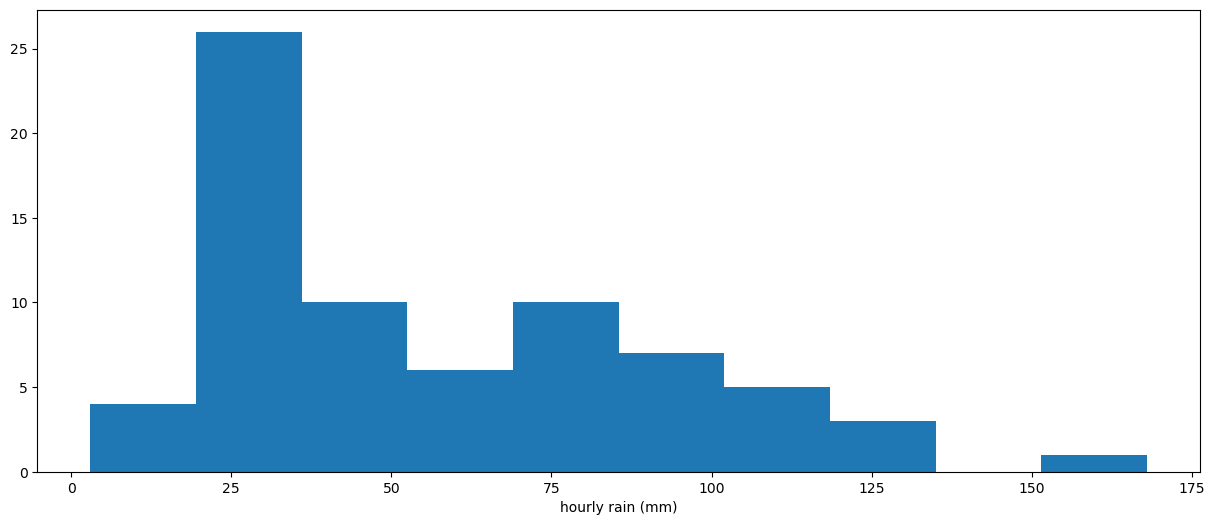

In [36]:
fig, ax = plt.subplots()
ax.hist(rain)
ax.set_xlabel("hourly rain (mm)");

## Maximum likelihood

We *could* look up the likelihood function for the
[Gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution)
and then try to solve it for the maximum.
But we're just trying to optimize over two parameters, so it's easy to do by computer:

In [37]:
from scipy.stats import gamma

def logL(theta, k):
    lpdfs = gamma.logpdf(rain, a=k, scale=theta) # "a" is the shape parameter here
    return np.sum(lpdfs)

from scipy.op timize import minimize
max_L = minimize(lambda x: -logL(*x), x0=(24, 1.8))
mle_theta, mle_k = max_L['x']
max_L

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 348.1884538503342
        x: [ 2.118e+01  2.711e+00]
      nit: 9
      jac: [ 0.000e+00  7.629e-06]
 hess_inv: [[ 1.428e+01 -1.480e+00]
            [-1.480e+00  1.858e-01]]
     nfev: 33
     njev: 11

Here, there are two parameters, so the *likelihood surface* is a 2D surface.
One way to plot this is using a contour plot:
this shows the contours of a hill with maximum height at roughly around $\theta=20$
and $k=2.7$.

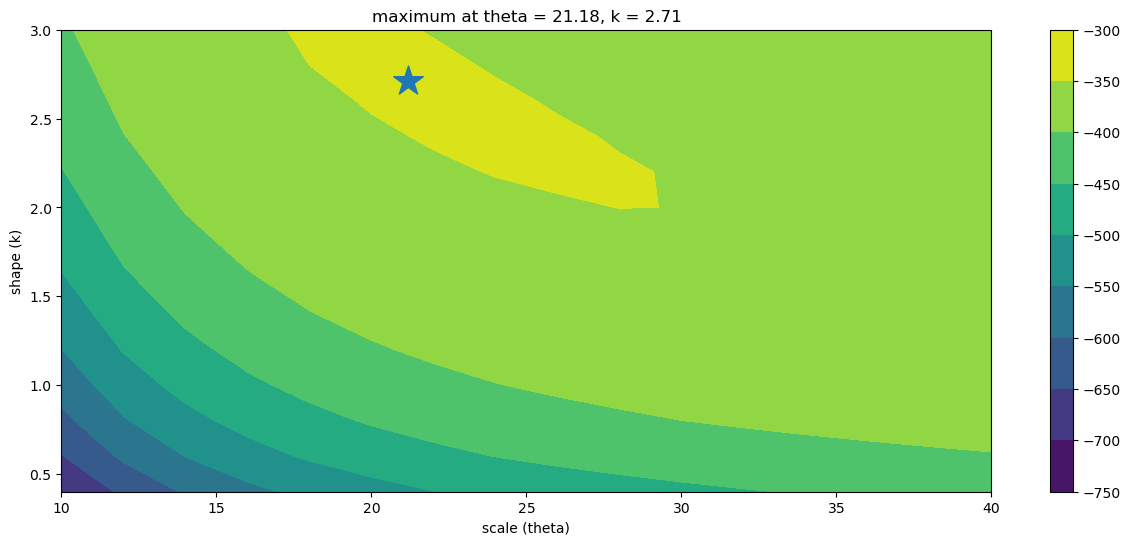

In [13]:
thetavals = dsci.pretty([10, 40], 20)
kvals = np.round(dsci.pretty([0.5, 3], 10), 2)
Lmap = np.array(
    [[logL(theta, k) for theta in thetavals] for k in kvals]
)

fig, ax = plt.subplots()
im = ax.contourf(thetavals, kvals, Lmap)
ax.scatter(mle_theta, mle_k, marker="*", s=500)
cbar = ax.figure.colorbar(im, ax=ax)
ax.set_xlabel("scale (theta)"); ax.set_ylabel("shape (k)")
ax.set_title(f"maximum at theta = {mle_theta:.2f}, k = {mle_k:.2f}");

**Comparison:** The method of moments estimator for this data is

In [48]:
obs_mean = np.mean(rain)
obs_sd = np.std(rain)
theta = obs_sd**2  / obs_mean
k = obs_mean**2 / obs_sd**2
print(f"MOM estimates: theta = {theta:.2f}, k = {k:.2f}.")
print(f"MLE estimates: theta = {max_L['x'][0]:.2f}, k = {max_L['x'][1]:.2f}.")

MOM estimates: theta = 20.25, k = 2.84.
MLE estimates: theta = 21.18, k = 2.71.


*What about our question?* Well,

In [49]:
print(f"The observed mean rainfall/hour is {obs_mean:.3f} mm and the MLE-predicted mean is {(mle_theta * mle_k):.3f} mm.")

The observed mean rainfall/hour is 57.417 mm and the MLE-predicted mean is 57.417 mm.


What's the chance that a given hour has more than 100mm of rain?

In [43]:
scipy.stats.gamma.sf(100, a=mle_k, scale=mle_theta), scipy.stats.gamma.sf(100, a=k, scale=theta)

(np.float64(0.1149931869997239), np.float64(0.10741373144705472))

# Goodness-of-fit, uncertainty, and the power of simulation

In summary, we've got (hopefully) good estimates of the *parameters* in *model*
that we think ought to fit the rainfall data.

Let's continue, asking
1. *Is it a good model for the data?* and
2. *how certain are we about the parameter estimates?*

To do this, we'll simulate data under the model, with the fitted parameters, and ask:
1. Does the simulated data look like the real data?
2. If we re-do inference, how far off are we from the true values?

In [16]:
rain

array([ 17.,  99.,  79.,  24.,  32.,  45.,  93.,  83., 113.,  32.,   3.,
       114.,  71.,  98.,  56.,  31.,  95.,  31.,  76.,  83.,  70., 107.,
        23.,  40., 168.,  43.,  43.,  28.,  20.,  49.,  26.,  32.,  10.,
        58.,  52.,  35.,  81., 124.,  28.,  46.,  25., 120.,  24.,  17.,
        57.,  96.,  59., 100.,  33.,  74.,  27.,  33.,  33.,  35.,  76.,
       104.,  31.,  24.,  33.,  24.,  73.,  34.,  50.,  53.,  50.,  33.,
       106., 125.,  44.,  94.,  35.,  54.])

In [18]:
def sim_rain():
    sim_x = rng.gamma(shape=mle_k, scale=mle_theta, size=len(rain))
    return np.round(sim_x)

sim_rain()

array([ 78.,  89.,  54.,  86.,  39.,  24.,  47.,  66., 103.,  71., 109.,
        61.,  81.,  39.,  13.,  75.,  53.,  64.,   9.,  54., 124.,  10.,
        82.,  41., 115.,  11.,  29.,  18.,  34.,  85.,  61., 100., 140.,
        65.,  29.,  43.,  23.,  71., 131.,  95.,  27.,  48.,  12.,  41.,
        16.,  90.,  16.,  67.,  15.,  17., 192.,  60.,  82., 116.,  70.,
        78.,  30.,  40.,  57.,  19.,  44.,  38.,  70.,  50.,  88.,  21.,
        35.,  37.,  79.,  70.,  32.,  46.])

In [24]:
def summary(x, label=""):
    print(f"{label}:: min: {np.min(x)}, q25: {np.quantile(x, 0.25)}, "
          f"median: {np.median(x)}, q75: {np.quantile(x, 0.75)}, max: {np.max(x)}")

summary(rain, "data")
for _ in range(10):
    summary(sim_rain(), "sim")

data:: min: 3.0, q25: 31.75, median: 47.5, q75: 81.5, max: 168.0
sim:: min: 5.0, q25: 32.0, median: 49.0, q75: 70.75, max: 184.0
sim:: min: 9.0, q25: 34.25, median: 61.5, q75: 80.25, max: 198.0
sim:: min: 7.0, q25: 37.5, median: 57.0, q75: 74.25, max: 212.0
sim:: min: 9.0, q25: 32.25, median: 51.0, q75: 76.5, max: 195.0
sim:: min: 9.0, q25: 39.5, median: 49.0, q75: 70.0, max: 166.0
sim:: min: 10.0, q25: 36.0, median: 53.0, q75: 71.0, max: 143.0
sim:: min: 7.0, q25: 30.75, median: 51.5, q75: 76.25, max: 158.0
sim:: min: 6.0, q25: 34.5, median: 48.0, q75: 63.25, max: 153.0
sim:: min: 4.0, q25: 27.75, median: 48.5, q75: 84.5, max: 158.0
sim:: min: 5.0, q25: 36.75, median: 50.0, q75: 79.75, max: 175.0


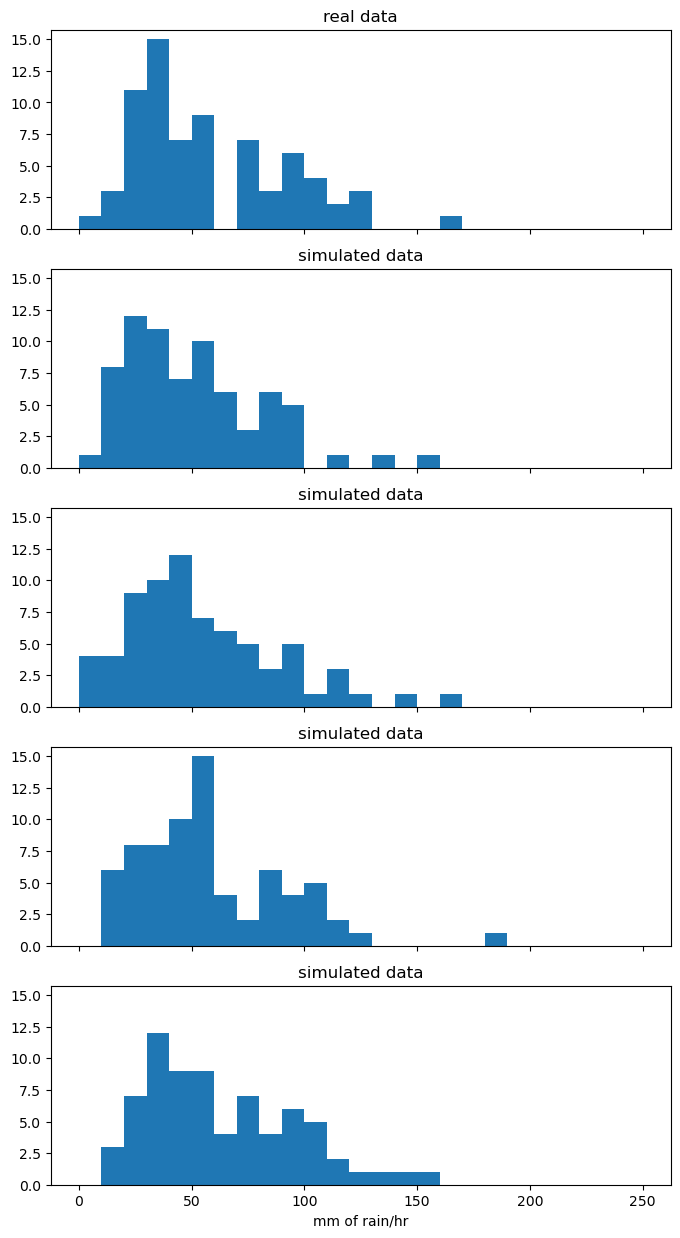

In [19]:
num_reps = 4
fig, axes = plt.subplots(num_reps + 1, 1, figsize=(8, 15), sharex=True, sharey=True)

bins = dsci.pretty((0, 250), 30)
axes[0].hist(rain, bins=bins)
axes[0].set_title("real data")

for k in range(1, num_reps + 1):
    sim_x = sim_rain()
    axes[k].hist(sim_x, bins=bins)
    axes[k].set_title("simulated data")
    
axes[-1].set_xlabel("mm of rain/hr");

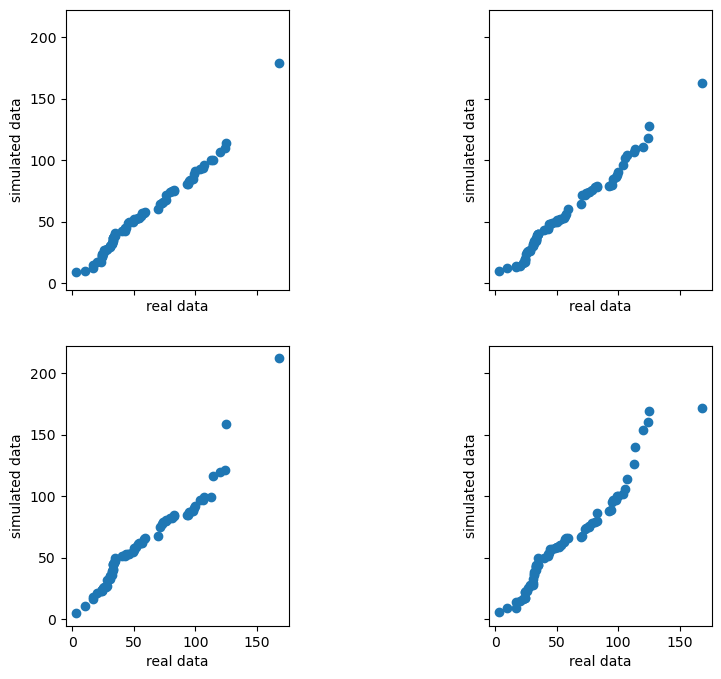

In [25]:
num_reps = 4
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for k in range(4):
    ax = axes.flatten()[k]
    sim_x = sim_rain()
    ax.scatter(np.sort(rain), np.sort(sim_x))
    ax.set_xlabel("real data")
    ax.set_ylabel("simulated data")
    ax.set_aspect(1)

In [26]:
def do_inference(rain):
    def logL(theta, k):
        lpdfs = gamma.logpdf(rain, a=k, scale=theta) # "a" is the shape parameter here
        return np.sum(lpdfs)

    max_L = minimize(lambda x: -logL(*x), x0=(24, 1.8))
    return max_L['x']

{'estimated': do_inference(sim_rain()), 'true value used in simulation': (mle_theta, mle_k)}

{'estimated': array([21.49661153,  2.69810021]),
 'true value used in simulation': (np.float64(21.17999437689288),
  np.float64(2.7108916773550895))}

Now we'll simulate a lot of datasets,
all using the same choice of $\theta$ and $k$,
and for each dataset use our MLE code above
to estimate $\theta$ and $k$.
Then, by looking at how wide the distribution of estimated values
are about the true values,
we can see how far off our estimations are likely to be.

In [28]:
num_reps = 200
estim_array = np.zeros((num_reps, 2))
for k in range(num_reps):
    estim_array[k,:] = do_inference(sim_rain())

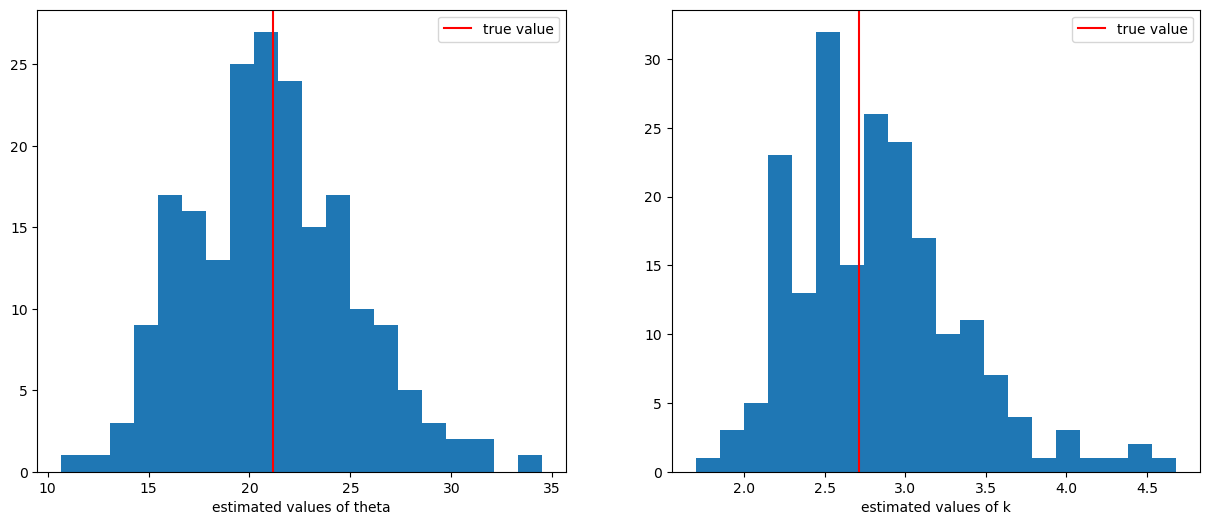

In [29]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.hist(estim_array[:,0], bins=20)
ax0.axvline(mle_theta, label="true value", c='red')
ax0.set_xlabel("estimated values of theta")
ax0.legend()
ax1.hist(estim_array[:,1], bins=20)
ax1.axvline(mle_k, label="true value", c='red')
ax1.set_xlabel("estimated values of k")
ax1.legend();

In summary, our estimated value for theta (the scale parameter) is about 21,
but with a wide range of uncertainty - it could reasonably be anything between about 12.5 and 30.
For the shape parameter (k), the maximum likelihood estimate is about 2.7,
with a reasonable range between about 2.0 and 4.5.

*(What exactly we're doing here - getting a confidence interval - is something we'll talk about later.)*